In [1]:
#import statements
import seaborn as sns
import glob
import numpy as np
import pandas as pd

## Step 1: Investigate the taxonomic profile of the reads

In [2]:
#Reformat the kraken files such that they can be read by ktImportText of KronaTools
#Then run ktImportText on the command line
files = glob.glob("/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR*kraken")

for file in files:
    output_file = file + "_formatted"
    ofile = open(output_file, 'w')
    print(output_file)
    #strip the sample ID from the file, then split out the taxonomy tree from semi-colons to tab separated
    with open (file, 'r') as f:
        for line in f:
            fields = line.rstrip().split('\t')
            taxonomy_data = fields[1]
            taxonomy_fields = taxonomy_data.split(';')
            formatted_string = ''
            for field in taxonomy_fields:
                formatted_string = formatted_string + field + '\t'
            
            ofile.write(formatted_string + '\n')
    
    ofile.close()


/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492193.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492183.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492189.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492197.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492190.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492186.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492194.kraken_formatted
/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/SRR492188.kraken_formatted


## Step 3: Estimate the taxonomy of your putative genomes

In [3]:
assembly_file = '/Users/cmdb/qbb2020-answers/assignment10/week13_data/KRAKEN/assembly.kraken'

kraken_taxonomies = {}

#extract all kraken taxonomies from the assembly file into a dictionary
#where the scaffolds IDs are the key, and the taxonomy data is the stored data
with open (assembly_file, 'r') as a_file:
    for line in a_file:
        fields = line.rstrip().split('\t')
        scaffold = fields [0]
        if scaffold not in kraken_taxonomies:
            taxonomy_data = fields [1]
            kraken_taxonomies[scaffold] = taxonomy_data
        else:
            print("I had a duplicate scaffold")

            

In [4]:
#extract the scaffold headers from each bin
#place scaffold names of each bin in a list, which are stored in another list 
files = glob.glob("/Users/cmdb/qbb2020-answers/assignment10/bins/bin*")
files = sorted(files)
print(files)

bin_scaffolds = []
for file in files:
    scaffolds = []
    with open(file, 'r') as bin_file:
        for line in bin_file:
            if ">" in line:
                line = line.rstrip()
                line = line[1:]
                scaffolds.append(line)
    bin_scaffolds.append(scaffolds)
  
print(len(bin_scaffolds))

['/Users/cmdb/qbb2020-answers/assignment10/bins/bin.1.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.2.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.3.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.4.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.5.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.6.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.7.fa', '/Users/cmdb/qbb2020-answers/assignment10/bins/bin.8.fa']
8


In [5]:
#grab the corresponding classifications from each bin based on the scaffold names
bin_classifications =[]

for i, scaffolds in enumerate(bin_scaffolds):
    classification = []
    for scaffold in scaffolds:
        if scaffold in kraken_taxonomies:
            classification.append(kraken_taxonomies[scaffold])
    bin_classifications.append(classification)


In [6]:
#count the genus/species within each bin based on kraken taxonomy dictionary
#output the species detected in each bin within another dictionary
current_bin = 0
for bin_classification in bin_classifications:
    current_bin +=1
    print("Current bin is " + str(current_bin))
    species_dict = {}
    for classification in bin_classification:
        taxonomy_fields = classification.split(';')
        species = taxonomy_fields[-1]
        if species not in species_dict:
            species_dict[species] = 1
        else:
            species_dict[species] +=1
    print(species_dict)
    print('\n')
    

Current bin is 1
{'Staphylococcus haemolyticus JCSC1435': 46, 'Staphylococcus epidermidis RP62A': 3, 'Staphylococcus epidermidis ATCC 12228': 4, 'Staphylococcus aureus subsp. aureus CN1': 1, 'Staphylococcus epidermidis': 2, 'Staphylococcus aureus subsp. aureus Mu50': 3, 'Staphylococcus aureus subsp. aureus USA300': 2, 'Staphylococcus aureus subsp. aureus': 1, 'Staphylococcus aureus CA-347': 1, 'Staphylococcus aureus subsp. aureus 11819-97': 1, 'Staphylococcus aureus subsp. aureus ST398': 2, 'Staphylococcus aureus subsp. aureus 6850': 1, 'Staphylococcus aureus subsp. aureus MSSA476': 1, 'Anaerococcus prevotii DSM 20548': 2, 'Staphylococcus aureus subsp. aureus ECT-R 2': 1, 'Staphylococcus': 1}


Current bin is 2
{'Leuconostoc citreum KM20': 186, 'Leuconostoc kimchii IMSNU 11154': 5, 'Leuconostoc gelidum JB7': 1, 'Leuconostoc mesenteroides subsp. mesenteroides ATCC 8293': 1, 'Streptococcus thermophilus LMD-9': 1}


Current bin is 3
{'Staphylococcus lugdunensis HKU09-01': 35, 'Staphylococ

## Step 4: Make a heatmap of the individual bin abundances over time

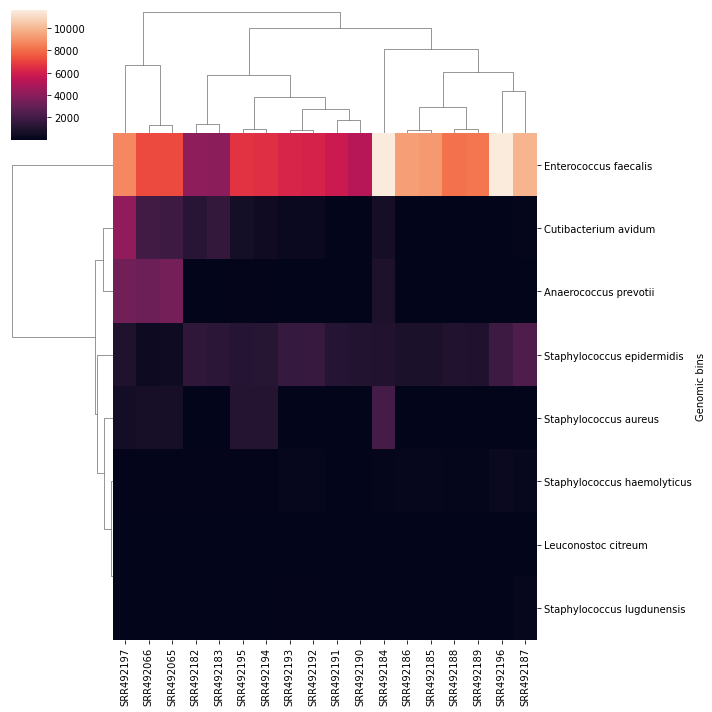

In [7]:
abundance_file = '/Users/cmdb/qbb2020-answers/assignment10/abundance_table.tab'

df = pd.read_csv(abundance_file, sep='\t')

#label the bins based on the most abundant genus_species in the bin
df.iloc[0,0] = "Staphylococcus haemolyticus"
df.iloc[1,0] = "Enterococcus faecalis"
df.iloc[2,0] = "Leuconostoc citreum"
df.iloc[3,0] = "Cutibacterium avidum"
df.iloc[4,0] = "Staphylococcus epidermidis"
df.iloc[5,0] = "Staphylococcus aureus"
df.iloc[6,0] = "Anaerococcus prevotii"
df.iloc[7,0] = "Staphylococcus lugdunensis"
df = df.set_index('Genomic bins')

#generate a clustermap using seaborn
map = sns.clustermap(df)
